In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, time
from sklearn import svm

id = 1815478 #me
# id = 259972 #jakads
# id = 5610085 #etiennexc
filename = '{}.csv'.format(id)
player_data = pd.read_csv(filename)

In [318]:
startTime = time.time()

In [319]:
player_data['MA'] = player_data['count_geki']/player_data['count_300']
player_data['pass_rate'] = player_data['passcount']/player_data['playcount']
test_ind = random.sample(range(51), 5)
test_ind.sort()
test_data = player_data.loc[test_ind]
training_data = player_data.loc[[i for i in range(51) if i not in test_ind]]
test_data

,difficulty_rating,accuracy,bpm,count_circles,count_sliders,hit_length,passcount,playcount,total_length,count_50,count_100,count_300,count_geki,count_katu,count_miss,mods,pp,MA,pass_rate
28,5.22,8.0,256.0,1357,214,120,49254,177595,121,4,42,497,853,153,22,0,200.242,1.716298,0.277339
32,4.54,8.0,222.0,1740,103,151,24948,106875,155,0,2,540,1269,30,2,0,196.095,2.350000,0.233432
33,4.58,8.0,225.5,1660,70,117,23769,88326,118,0,5,543,1129,51,2,0,195.276,2.079190,0.269105
34,4.66,8.0,191.0,1279,185,131,169302,488750,173,1,13,345,1040,56,9,0,195.240,3.014493,0.346398
48,4.51,8.0,180.0,3927,676,433,36667,148848,436,5,1,1067,3465,56,9,0,189.617,3.247423,0.246339


In [320]:
test_data.loc[test_ind[0], ['difficulty_rating', 'bpm']]

difficulty_rating    5.22
bpm                   256
Name: 28, dtype: object

In [321]:
X = training_data[['difficulty_rating', 'total_length']]
Y = training_data['MA']
regr = svm.SVR(epsilon = 0.8, C = 0.75)
regr.fit(X,Y);
# player_data[['difficulty_rating']]

In [322]:
countCorrect = 0;
meanSquareError = 0;

for i in range(len(test_data)):
    # I have no idea what happened here but it works so I'm not changing it
    predictedMA = regr.predict(pd.DataFrame.transpose(pd.DataFrame(test_data.loc[test_ind[i], ['difficulty_rating', 'total_length']])))
    actualMA = test_data.loc[test_ind[i], 'MA']
    print('Predicted MA: %.3f, Actual MA: %.3f' % (predictedMA, actualMA))
    
    # calculate error statistics
    error = abs(predictedMA - actualMA)
    if (abs(error) < 1):
        countCorrect += 1
    meanSquareError += error ** 2

print('\nPercent within Epsilon of 0.8: %d%%' % (countCorrect/5 * 100))
print('Mean square error: %.2f' % (meanSquareError))

Predicted MA: 2.675, Actual MA: 1.716
Predicted MA: 2.667, Actual MA: 2.350
Predicted MA: 2.676, Actual MA: 2.079
Predicted MA: 2.655, Actual MA: 3.014
Predicted MA: 2.541, Actual MA: 3.247

Percent within Epsilon of 0.8: 100%
Mean square error: 2.00


In [323]:
test_ind = np.random.randint(51, size=5)

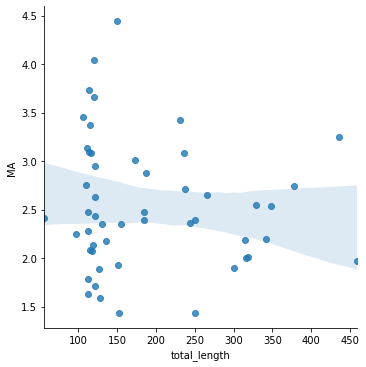

In [324]:
sns.lmplot(data=player_data, x='total_length', y='MA')

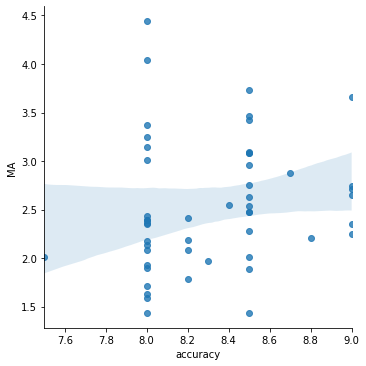

In [325]:
sns.lmplot(data=player_data, x='accuracy', y='MA')

In [326]:
print("Time to execute: %.4f seconds" % (time.time() - startTime))

Time to execute: 1.0900 seconds
